`63070501061 S.RAKNA`

# Gradient Descent

#### 1. The following points $(x_i, y_i)$ are discrete samples from a function $f(x) = ax^3 + bx^2 + cx + d$.

> 5 points. 0.5 hrs

##### a. Show the update rule equation used to find the current $a, b, c,$ and $d$ after each iteration. 
- Make sure you show the mathematics on how this is derived.

<p style="color: red;">The answer is in an <code>update()</code> method </p>

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


In [3]:
STEP_SIZE = 0.000005
ITERATE = 100000


class Polynomial:
    def __init__(self, coefficients, points):
        self.coefficients = coefficients
        self.points = points
        self.degree = len(coefficients) - 1

    def f(self, x, coefficients=None):
        """
        Evaluate the polynomial at x.
        f(x) = sum(coefficients[i] * x^(i - 1))
        """

        if coefficients is None:
            coefficients = self.coefficients

        return sum(
            coefficients[i] * x ** i
            for i in range(self.degree + 1)
        )

    def residual(self, point, coefficients=None):
        """
        Calculate the residual of the polynomial at the given point.
        residual = y - f(x)
        """
        if coefficients is None:
            coefficients = self.coefficients
        return point.y - self.f(point.x, coefficients=coefficients)

    def E(self, coefficients=None):
        """
        Calculate the error of the polynomial.
        E = sum((y - f(x))^2)
        """
        if coefficients is None:
            coefficients = self.coefficients

        return sum(
            self.residual(point, coefficients=coefficients) ** 2
            for point in self.points
        )

    def gradient(self):
        """
        Calculate the gradient of the polynomial.
        gradient = sum(-2 * (y - f(x)) * x^(i - 1))
        """
        return np.array([
            sum([
                -2 * self.residual(point) * point.x ** i
                for point in self.points
            ])
            for i in range(self.degree + 1)
        ])

    def update(self, step_size):
        """
        Update the coefficients of the polynomial with respect to the step_size.
        """
        gradient = self.gradient()
        self.coefficients = [
            self.coefficients[i] - step_size *
            gradient[i]  # update coefficient
            for i in range(self.degree + 1)
        ]

    def plot_fitted(self):
        """
        Plot the fitted polynomial.
        """
        # self.points x min to max
        plt.plot([point.x for point in self.points], [self.f(point.x)
                                                      for point in self.points], 'b--')
        plt.plot([point.x for point in self.points], [
                 point.y for point in self.points], 'ro')
        plt.show()

    def gradient_descent(self, step_size=STEP_SIZE, max_iterations=ITERATE):
        """
        Perform gradient descent on the polynomial.
        """
        E_list = np.array([self.E()])

        for i in range(max_iterations):
            self.update(step_size)
            if i % (max_iterations // 20) == 0:
                E = self.E()
                print(f"iteration: {i}, error: {E}")
                E_list = np.append(E_list, E)

        # Plot the error with dash
        plt.plot(E_list, 'r--')
        plt.show()

        print(f"Final error: {self.E()}")


> 15 points. 2 hrs

##### b. Write a program to find the best fit $a, b, c,$ and $d$ using gradient descent. 
- You must write the gradient descent loop yourself and not use any gradient descent libraries. Attach the source code as well. 

> Hint: You should get a, b, c, and d close to 0.5, 5.3, -2.7, and 3.5, respectively.

In [4]:
points = np.array([
    Point(-6, 103),
    Point(-5, 87),
    Point(-4, 67),
    Point(-3, 46),
    Point(-2, 26),
    Point(-1, 11),
    Point(0, 4),
    Point(1, 7),
    Point(2, 23),
    Point(3, 57),
    Point(4, 110),
    Point(5, 185),
    Point(6, 286)
])


iteration: 0, error: 125834.50962747977
iteration: 5000, error: 50.80047424619335
iteration: 10000, error: 23.021990688693872
iteration: 15000, error: 12.940220319662316
iteration: 20000, error: 7.590666671521928
iteration: 25000, error: 4.589985658011129
iteration: 30000, error: 2.896204431836413
iteration: 35000, error: 1.9394633532739545
iteration: 40000, error: 1.3990025256526237
iteration: 45000, error: 1.0936949443109005
iteration: 50000, error: 0.9212258254783291
iteration: 55000, error: 0.8237975214524882
iteration: 60000, error: 0.7687599901498645
iteration: 65000, error: 0.7376691291758506
iteration: 70000, error: 0.7201058116841061
iteration: 75000, error: 0.7101842427195949
iteration: 80000, error: 0.7045795196503887
iteration: 85000, error: 0.7014133953413322
iteration: 90000, error: 0.699624842541016
iteration: 95000, error: 0.6986144838793805


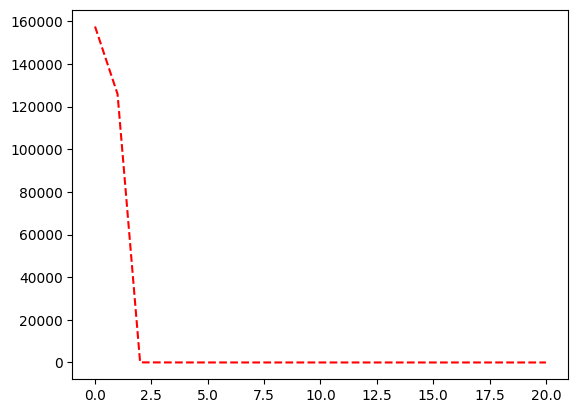

Final error: 0.6980438139882507


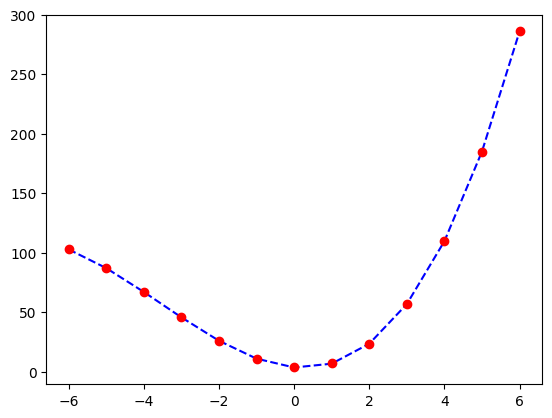

coefficients: [3.645959969009583, -2.6158841158819826, 5.299656678923404, 0.4965034965034242]


In [5]:
coefficients = np.array([0, 0, 0, 0])
polynomial = Polynomial(coefficients, points)
polynomial.gradient_descent()

# Plot the points and the polynomial, points in red
polynomial.plot_fitted()

# print the coefficients of the polynomial
print(f"coefficients: {polynomial.coefficients}")

> 10 points. 1 hr.
#### 2. Redo Problem *1b*, but use the **numerical method** to calculate all your partial derivatives, where $h$ is a very small number.
#### $\frac{\partial}{{\partial}{x_i}}f(x_1,\dots\,,x_i,\,\dots,\,x_n)=\frac{f(x_1,\dots\,,x_i+h,\,\dots,\,x_n)-f(x_1,\dots\,,x_i-h,\,\dots,\,x_n)}{2h}$

In [6]:
class NumericalPolynomial(Polynomial):
    def __init__(self, coefficients, points):
        super().__init__(coefficients, points)

    # Override the gradient function
    def gradient(self):
        """
        This time we will use numerical differentiation to calculate the gradient of E()
        """

        h = 1e-12
        new = np.array([])

        for i in range(self.degree + 1):
            c_plus = self.coefficients.copy()
            c_plus[i] += h
            c_minus = self.coefficients.copy()
            c_minus[i] -= h
            new = np.append(new, (self.E(c_plus) - self.E(c_minus)) / (2 * h))

        return new


iteration: 0, error: 157544.0
iteration: 5000, error: 50.776398822127334
iteration: 10000, error: 23.001892181994588
iteration: 15000, error: 12.930176340418006
iteration: 20000, error: 7.580968633566008
iteration: 25000, error: 4.582066413979411
iteration: 30000, error: 2.8914249832653622
iteration: 35000, error: 1.9368309689171264
iteration: 40000, error: 1.3973421503339343
iteration: 45000, error: 1.0926946460428328
iteration: 50000, error: 0.9206457053472562
iteration: 55000, error: 0.8234638049902477
iteration: 60000, error: 0.7685695919190993
iteration: 65000, error: 0.7375602559134468
iteration: 70000, error: 0.7200425524287477
iteration: 75000, error: 0.7101468393301835
iteration: 80000, error: 0.7045580382588126
iteration: 85000, error: 0.7014010646666232
iteration: 90000, error: 0.6996176905637513
iteration: 95000, error: 0.6986101333504453


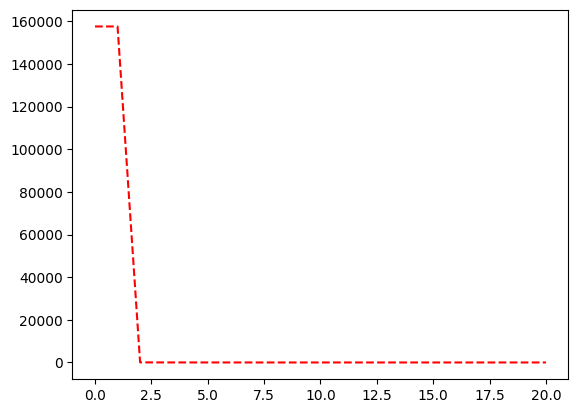

Final error: 0.6980413054406204


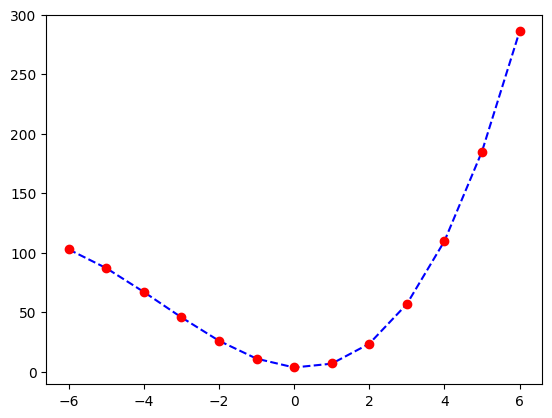

coefficients: [3.6459792485121767, -2.6158849603108436, 5.299655869150932, 0.4965035083071001]


In [7]:
# This section is step of gradient descent algorithm
# Initialize the coefficients of the polynomial
numerical_polynomial = NumericalPolynomial(coefficients, points)
numerical_polynomial.gradient_descent()

# Plot the points and the polynomial, points in red
numerical_polynomial.plot_fitted()

# print the coefficients of the polynomial
print(f"coefficients: {numerical_polynomial.coefficients}")


> 10 points. 1 hr.
#### 3. Solve Problem *1b* using **Pseudo-Inverse Linear Regression** to find $(a, b, c, d)$ 
- You can use numpy or other tools to invert matrices.

In [8]:
class PseudoInversePolynomial(Polynomial):
    def __init__(self, coefficients, points):
        super().__init__(coefficients, points)

    def pseudo_inverse(self):
        """
        Calculate the pseudo inverse of the matrix A.
        """
        A = np.array([
            [point.x ** i for i in range(self.degree + 1)]
            for point in self.points
        ])
        print(f"A =\n{A}\n")
        X = np.linalg.inv(A.T @ A) @ A.T
        print(f"X =\n{X}")
        # return np.linalg.pinv(A) can also be used
        return X


A =
[[   1   -6   36 -216]
 [   1   -5   25 -125]
 [   1   -4   16  -64]
 [   1   -3    9  -27]
 [   1   -2    4   -8]
 [   1   -1    1   -1]
 [   1    0    0    0]
 [   1    1    1    1]
 [   1    2    4    8]
 [   1    3    9   27]
 [   1    4   16   64]
 [   1    5   25  125]
 [   1    6   36  216]]

X =
[[-7.69230769e-02  2.34187669e-17  6.29370629e-02  1.11888112e-01
   1.46853147e-01  1.67832168e-01  1.74825175e-01  1.67832168e-01
   1.46853147e-01  1.11888112e-01  6.29370629e-02  2.34187669e-17
  -7.69230769e-02]
 [ 4.71611722e-02 -2.74725275e-02 -6.56843157e-02 -7.47585748e-02
  -6.19796870e-02 -3.46320346e-02  0.00000000e+00  3.46320346e-02
   6.19796870e-02  7.47585748e-02  6.56843157e-02  2.74725275e-02
  -4.71611722e-02]
 [ 1.09890110e-02  5.49450549e-03  9.99000999e-04 -2.49750250e-03
  -4.99500500e-03 -6.49350649e-03 -6.99300699e-03 -6.49350649e-03
  -4.99500500e-03 -2.49750250e-03  9.99000999e-04  5.49450549e-03
   1.09890110e-02]
 [-3.20512821e-03 -2.71050543e-19  1.748

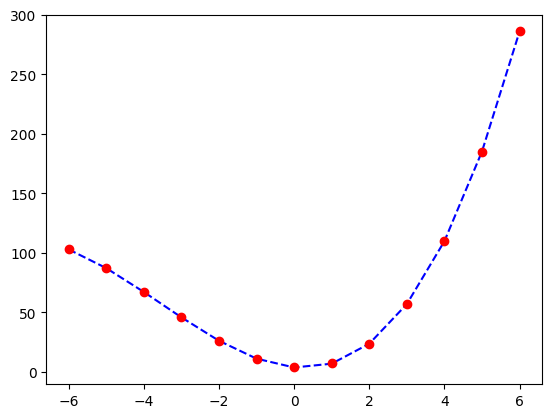

coefficients: [ 3.65734266 -2.61588412  5.2992008   0.4965035 ]
error: 0.6973026973027058


In [9]:
pseudo_inverse_polynomial = PseudoInversePolynomial(coefficients, points)

pseudo_inverse = pseudo_inverse_polynomial.pseudo_inverse()

pseudo_inverse_polynomial.coefficients = np.dot(
    pseudo_inverse, [point.y for point in points])

# Plot the points and the polynomial, points in red
pseudo_inverse_polynomial.plot_fitted()

# print the coefficients of the polynomial
print(f"coefficients: {pseudo_inverse_polynomial.coefficients}")
print(f"error: {pseudo_inverse_polynomial.E()}")


> 10 points. 1 hr.
#### 3. Solve Problem *1b* using the **Gauss-Newton method** to find $(a, b, c, d)$
- You can use numpy or other tools to invert matrices in each iteration

#### $X^{t+1}=X^t-{\alpha}J^{\#1}r(X^t)=X^t-{\alpha}(J^TJ)^{-1}J^Tr(X^t);{\alpha}=1 \text{works for linear case}$

In [10]:
class GaussNewtonPolynomial(Polynomial):
    def __init__(self, coefficients, points):
        super().__init__(coefficients, points)
        self.J = self.jacobian()

        print(f"Jacobian matrix:\n{self.J}")

    def jacobian(self):
        """
        Calculate the jacobian matrix.
        """
        return np.array([
            [point.x ** i for i in range(self.degree + 1)]
            for point in self.points
        ])

    def update(self, step_size):
        """
        Update the coefficients of the polynomial with respect to the step_size 
        using Gauss-Newton algorithm with Jacobian matrix.
        """

        r = np.array([self.residual(point) for point in self.points])
        
        delta = np.linalg.inv(self.J.T @ self.J) @ self.J.T @ r

        self.coefficients = [
            self.coefficients[i] + step_size * delta[i] # update coefficient
            for i in range(self.degree + 1)
        ]

Jacobian matrix:
[[   1   -6   36 -216]
 [   1   -5   25 -125]
 [   1   -4   16  -64]
 [   1   -3    9  -27]
 [   1   -2    4   -8]
 [   1   -1    1   -1]
 [   1    0    0    0]
 [   1    1    1    1]
 [   1    2    4    8]
 [   1    3    9   27]
 [   1    4   16   64]
 [   1    5   25  125]
 [   1    6   36  216]]
iteration: 0, error: 157512.49291489358
iteration: 5000, error: 57943.151262129526
iteration: 10000, error: 21315.46904910601
iteration: 15000, error: 7841.57154181026
iteration: 20000, error: 2885.0495052462893
iteration: 25000, error: 1061.738122208174
iteration: 30000, error: 391.01288887055915
iteration: 35000, error: 144.2792026660793
iteration: 40000, error: 53.515490668634015
iteration: 45000, error: 20.127056595119363
iteration: 50000, error: 7.844752298087844
iteration: 55000, error: 3.326570986774378
iteration: 60000, error: 1.6645080816213582
iteration: 65000, error: 1.05309988209391
iteration: 70000, error: 0.8281866220172078
iteration: 75000, error: 0.7454497948

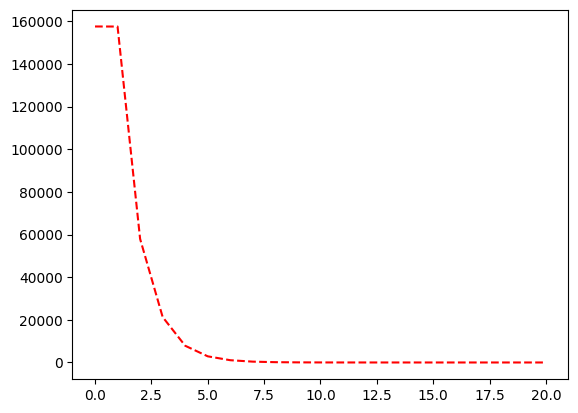

Final error: 0.6976270936714587


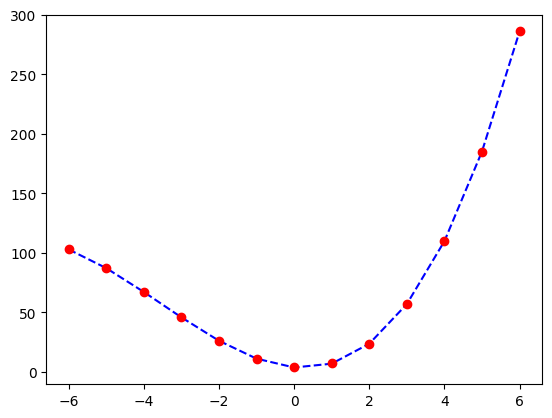

coefficients: [3.6571766972492257, -2.6157654142985676, 5.298960336126347, 0.49648096654817353]


In [11]:
# This section is step of gradient descent algorithm
# Initialize the coefficients of the polynomial
gauss_newton_polynomial = GaussNewtonPolynomial(coefficients, points)
gauss_newton_polynomial.gradient_descent(step_size=0.0001)

# Plot the points and the polynomial, points in red
gauss_newton_polynomial.plot_fitted()

# print the coefficients of the polynomial
print(f"coefficients: {gauss_newton_polynomial.coefficients}")